In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [4]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print(X_full.shape)
print(Y.shape)

(506, 13)
(506,)


In [5]:
selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print(X.shape)

(506, 1)


In [6]:
def plot_scatter(X, Y, R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='green')
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.5)
    plt.show()

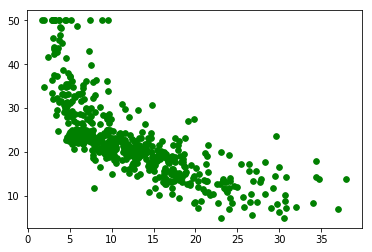

In [7]:
plot_scatter(X, Y)

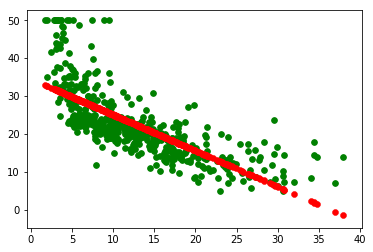

In [8]:
regressor = LinearRegression(normalize=True).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

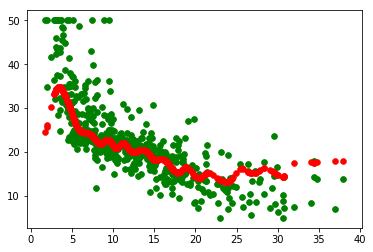

In [9]:
regressor = SVR().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

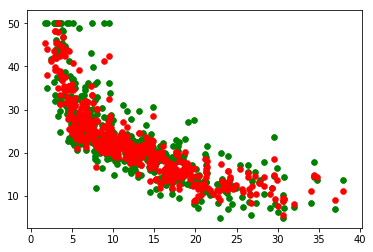

In [10]:
regressor = RandomForestRegressor().fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

In [11]:
from sklearn.datasets import fetch_mldata
earthquakes = fetch_mldata('global-earthquakes')
print(earthquakes.data)
print(earthquakes.data.shape)

[[ 3.460980e+04 -9.210000e+00  1.506300e+02  5.300000e+00]
 [ 5.222980e+04 -1.501000e+01 -1.739600e+02  5.000000e+00]
 [ 1.142375e+05 -3.551000e+01 -1.621000e+01  6.000000e+00]
 ...
 [ 2.555315e+04 -3.350000e+01 -7.217000e+01  5.000000e+00]
 [ 8.544900e+04 -3.546000e+01 -7.285000e+01  5.400000e+00]
 [ 9.303983e+04  5.447000e+01  1.102300e+02  5.300000e+00]]
(59209, 4)


In [12]:
X, y = datasets.make_classification(n_samples=10**6,
                                   n_features=10, random_state=101)
print(X.shape, y.shape)

(1000000, 10) (1000000,)


In [13]:
datasets.make_classification(1, n_features=4, random_state=101)

(array([[-3.31994186, -2.39469384, -2.35882002,  1.40145585]]), array([0]))

In [14]:
%timeit X, y = datasets.make_classification(n_samples=10**6, n_features=10, random_state=101)

598 ms ± 43.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.8428105894504943


In [17]:
%timeit regr.fit(X_train, Y_train)

530 µs ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
import numpy as np
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



In [20]:
%timeit clf.fit(X_train, Y_train)

2.85 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
